In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing/Feature Engineering

<h3><b>Column: Embarked

In [4]:
#df['Parch'].value_counts()
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<b>As only 2 values are null for the 'Embarked' column, imputing the these values to 'S' as these have the highest frequency in the dataset.

In [5]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<h3><b>Column: Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

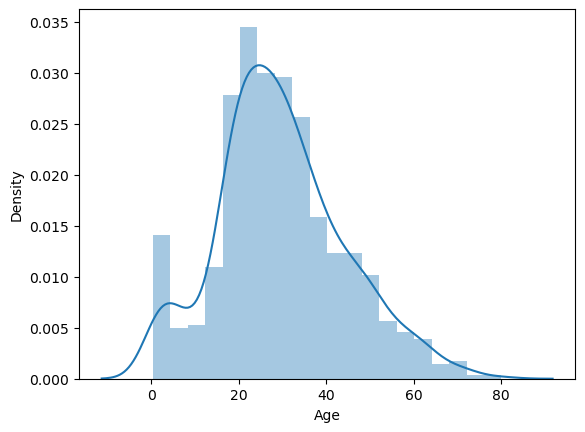

In [6]:
sns.distplot(df[df['Age'].notnull()]['Age'])

In [7]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<b>For the column 'Age', there are 177 null values, rather than dropping the null rows, these values can be imputed as it can be seen from above distribution plot that there is a huge amount of records in the range of 20-30s. Doing so with the interpolate() function

In [8]:
df['Age'] = df['Age'].interpolate()
df['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<b>Aplying the interpolate method hasn't affected the mean much from the previous data, so data can be used further.

<h3><b>Column: Cabin

In [9]:
len(df['Cabin'].unique())

148

<b>Dropping the column 'Cabin' as it has too many null values (687 null values) and 148 unique values, so it can't be imputed.

In [10]:
df = df.drop(['Cabin'], axis = 1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Check for data health

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<b>Can see that there are no more null values

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<b>Dropping columns PassengerId, Name, Ticket as they have no effect on the survival status and the Ticket column is not easy enought to understand

In [13]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='count'>

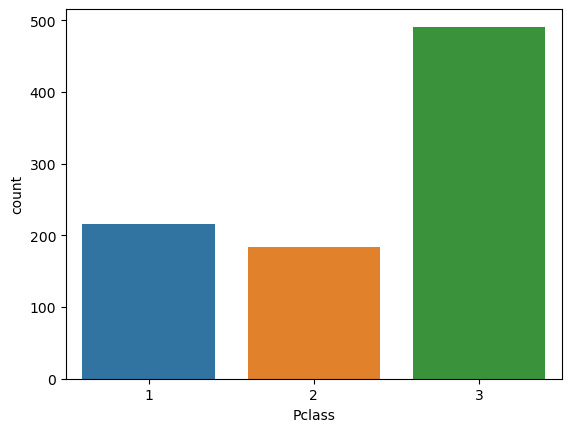

In [14]:
sns.countplot(x = 'Pclass', data=df)

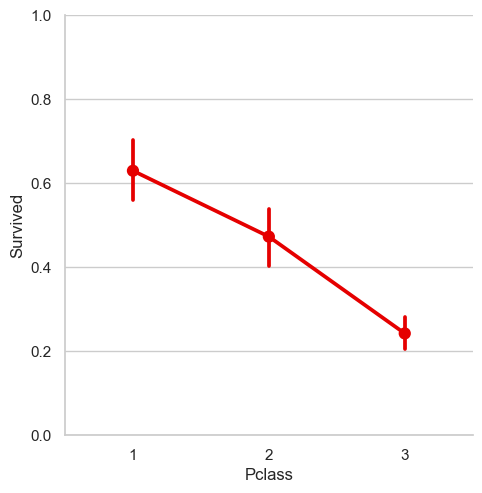

In [15]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

From above graph, it can be identified that people from a higher class have a better survival rate even though there are more passengers in the 3rd class

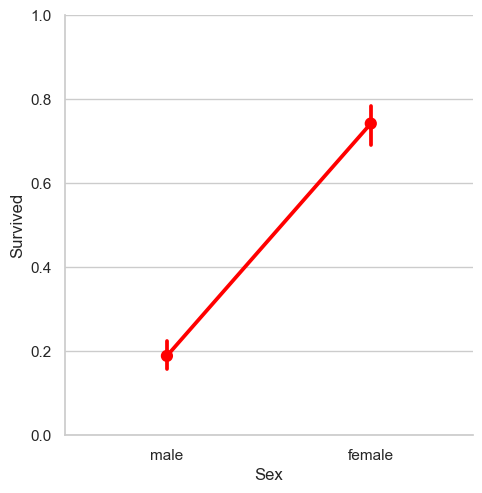

In [16]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

It can be further observed that women have a better survival rate - maybe because preference is given to women

Checking survival rate for Children, first creating a category for children based on age, if less than 15 they are considered a child, else they aren't

In [17]:
df['is_child'] = df['Age'].apply(lambda x: 1 if x <= 15 else 0)
df['is_child'].head()

0    0
1    0
2    0
3    0
4    0
Name: is_child, dtype: int64

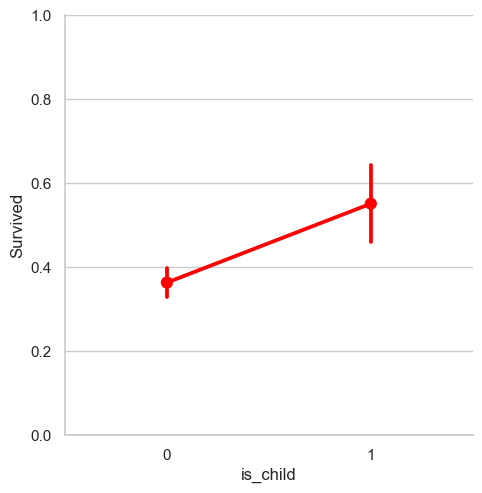

In [18]:
h = sns.PairGrid(data=df, x_vars=['is_child'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

It can be observed that children are having a higher survival rate, maybe because they are given a higher preference

In [19]:
df['family'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,family
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,0,1
4,0,3,male,35.0,8.0500,S,0,0


<b>Process Categorical columns to make it easier for the algorithms to work with

In [20]:
df['is_alone'] = df['family'].apply(lambda x: 1 if x == 0 else 0)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,family,is_alone
0,0,3,male,22.0,7.2500,S,0,1,0
1,1,1,female,38.0,71.2833,C,0,1,0
2,1,3,female,26.0,7.9250,S,0,0,1
3,1,1,female,35.0,53.1000,S,0,1,0
4,0,3,male,35.0,8.0500,S,0,0,1


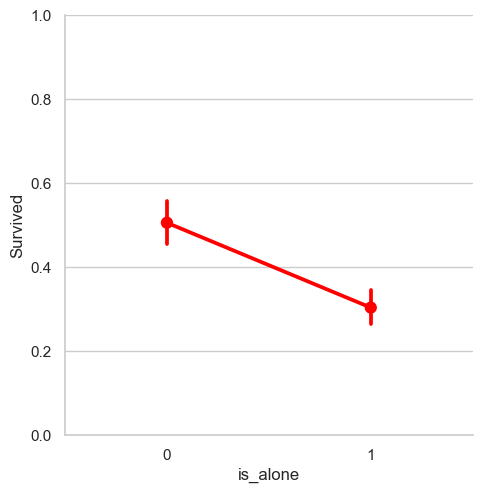

In [21]:
h = sns.PairGrid(data=df, x_vars=['is_alone'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

Those who aren't alone, having some family aboard seem to have a better survival rate

In [22]:
df['is_female'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,male,22.0,7.2500,S,0,1,0,0
1,1,1,female,38.0,71.2833,C,0,1,0,1
2,1,3,female,26.0,7.9250,S,0,0,1,1
3,1,1,female,35.0,53.1000,S,0,1,0,1
4,0,3,male,35.0,8.0500,S,0,0,1,0


In [23]:
df = df.drop(['Sex'], axis = 1)
df.head()

,Survived,Pclass,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,22.0,7.2500,S,0,1,0,0
1,1,1,38.0,71.2833,C,0,1,0,1
2,1,3,26.0,7.9250,S,0,0,1,1
3,1,1,35.0,53.1000,S,0,1,0,1
4,0,3,35.0,8.0500,S,0,0,1,0


In [24]:
df = pd.get_dummies(df, prefix='is_')
df.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is__C,is__Q,is__S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,0,1


## Start Training the models

In [46]:
X, y = df.drop(['Survived'], axis = 1), df['Survived']

In [47]:
X.head()

,Pclass,Age,Fare,is_child,family,is_alone,is_female,is__C,is__Q,is__S
0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,38.0,71.2833,0,1,0,1,1,0,0
2,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,35.0,53.1000,0,1,0,1,0,0,1
4,3,35.0,8.0500,0,0,1,0,0,0,1


In [48]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [49]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, stratify = y)

In [50]:
def dmp_first_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(test_X, test_y))
    return classifier

In [51]:
here_we_go = dmp_first_classifier(LogisticRegression)

0.7821229050279329


In [52]:
clf = LogisticRegression()
clf.fit(train_X, train_y)
y_pred_log_reg = clf.predict(test_X)
acc_log_reg = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_log_reg) + ' percent')

78.21 percent


<b>Running through multiple classification models

In [53]:
models = pd.DataFrame(columns=['Model', 'Accuracy Score', 'Precision', 'Recall', 'F1-Score'])
models_str_list = ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent']

In [54]:
models_list = [LogisticRegression, SVC, LinearSVC,
                KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier,
                GaussianNB, Perceptron, SGDClassifier]

classifier_list = []

for x, m in zip(models_list, models_str_list):
    clf = x()
    print("Fitting Model: " + str(clf))
    clf.fit(train_X, train_y)
    classifier_list.append(clf)
    print(clf.score(test_X, test_y))
    y_pred_log_reg = clf.predict(test_X)
    acc_log_reg = round( clf.score(test_X, test_y) * 100, 2)
    precision = metrics.precision_score(test_y, y_pred_log_reg)
    recall =  metrics.recall_score(test_y, y_pred_log_reg)
    f1 = metrics.f1_score(test_y, y_pred_log_reg)
    print ('Accuracy score = ' + str(acc_log_reg) + ' percent')
    print ('Precision = ' + str(precision))
    print ('Recall = ' + str(recall))
    print("\n")
    models = models.append({'Model': m, 'Accuracy Score': acc_log_reg, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)


Fitting Model: LogisticRegression()
0.7821229050279329
Accuracy score = 78.21 percent
Precision = 0.734375
Recall = 0.6811594202898551


Fitting Model: SVC()
0.6927374301675978
Accuracy score = 69.27 percent
Precision = 0.71875
Recall = 0.3333333333333333


Fitting Model: LinearSVC()
0.7541899441340782
Accuracy score = 75.42 percent
Precision = 0.7358490566037735
Recall = 0.5652173913043478


Fitting Model: KNeighborsClassifier()
0.6871508379888268
Accuracy score = 68.72 percent
Precision = 0.6140350877192983
Recall = 0.5072463768115942


Fitting Model: DecisionTreeClassifier()
0.7597765363128491
Accuracy score = 75.98 percent
Precision = 0.6911764705882353
Recall = 0.6811594202898551


Fitting Model: RandomForestClassifier()
0.7877094972067039
Accuracy score = 78.77 percent
Precision = 0.7313432835820896
Recall = 0.7101449275362319


Fitting Model: GaussianNB()
0.7597765363128491
Accuracy score = 75.98 percent
Precision = 0.703125
Recall = 0.6521739130434783


Fitting Model: Perceptro

In [55]:
# models = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
#               'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
#               'Perceptron', 'Stochastic Gradient Decent'],
    
#     'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
#               acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
#               acc_perceptron, acc_sgd]
#     })

models.sort_values(by='F1-Score', ascending=False)

,Model,Accuracy Score,Precision,Recall,F1-Score
5,Random Forest,78.77,0.731343,0.710145,0.720588
0,Logistic Regression,78.21,0.734375,0.681159,0.706767
8,Stochastic Gradient Decent,68.72,0.557522,0.913043,0.692308
4,Decision Tree,75.98,0.691176,0.681159,0.686131
6,Naive Bayes,75.98,0.703125,0.652174,0.676692
2,Linear SVC,75.42,0.735849,0.565217,0.639344
7,Perceptron,63.13,0.513514,0.826087,0.633333
3,KNN,68.72,0.614035,0.507246,0.555556
1,Support Vector Machines,69.27,0.718750,0.333333,0.455446


Random Forest has the highest F1 score, using it to predict

## Testing model against 'Holdings_testing.csv'

In [56]:
df_test = pd.read_csv('holdout_test.csv')
df_test.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     0 non-null      float64
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


<b>Data Preprocessing

In [58]:
df_test['Embarked'] = df_test['Embarked'].fillna('S')
df_test['Age'] = df_test['Age'].interpolate()
df_test = df_test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1)

df_test['is_child'] = df_test['Age'].apply(lambda x: 1 if x <= 15 else 0)
df_test['family'] = df_test['SibSp'] + df_test['Parch']
df_test = df_test.drop(['SibSp', 'Parch'], axis = 1)

df_test['is_alone'] = df_test['family'].apply(lambda x: 1 if x == 0 else 0)

df_test['is_female'] = df_test['Sex'].apply(lambda x: 1 if x == 'female' else 0)

df_test = df_test.drop(['Sex'], axis = 1)

df_test = pd.get_dummies(df_test, prefix='is_')
df_test.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is__C,is__Q,is__S
0,NaN,3,34.5,7.8292,0,0,1,0,0,1,0
1,NaN,3,47.0,7.0000,0,1,0,1,0,0,1
2,NaN,2,62.0,9.6875,0,0,1,0,0,1,0
3,NaN,3,27.0,8.6625,0,0,1,0,0,0,1
4,NaN,3,22.0,12.2875,0,2,0,1,0,0,1


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   0 non-null      float64
 1   Pclass     418 non-null    int64  
 2   Age        418 non-null    float64
 3   Fare       417 non-null    float64
 4   is_child   418 non-null    int64  
 5   family     418 non-null    int64  
 6   is_alone   418 non-null    int64  
 7   is_female  418 non-null    int64  
 8   is__C      418 non-null    uint8  
 9   is__Q      418 non-null    uint8  
 10  is__S      418 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 27.5 KB


In [60]:
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [61]:
df_test['Fare'] = df_test['Fare'].interpolate()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   0 non-null      float64
 1   Pclass     418 non-null    int64  
 2   Age        418 non-null    float64
 3   Fare       418 non-null    float64
 4   is_child   418 non-null    int64  
 5   family     418 non-null    int64  
 6   is_alone   418 non-null    int64  
 7   is_female  418 non-null    int64  
 8   is__C      418 non-null    uint8  
 9   is__Q      418 non-null    uint8  
 10  is__S      418 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 27.5 KB


In [62]:
test_X, test_y = df_test.drop(['Survived'], axis = 1), df_test['Survived']

<b>Predicting the values for the testing file using Logistic Regression as it has the highest accuracy

In [63]:
log_reg = classifier_list[5]
print(log_reg)
y_pred_log_reg = log_reg.predict(test_X)
y_pred_log_reg

RandomForestClassifier()


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
pd.DataFrame(y_pred_log_reg, columns=['Survived']).to_csv('Titanic Results from Shweta Sampath Kumar.csv', index = False)

<h3>Summary


When comparing the performance of the various models, based on F1 score and accuracy, it can be seen that Random Forest has the highest. This is probably as it is a culmination o multiple decision tress which reduces overfitting. While decision tree did have a good accuracy, it's precision and recall stats were much lower which means that the number of true positives and actual positives detected was lesser. 
Logistic Regression was the next best algorithm and this might be because logistic regression is one of the best algorithms for binary classification.
Stochastic Gradient Decent worked well and better than a decision tree and this might be because it is an optimization model for large datasets.
KNN and SVM had the lowest metrics amongst all the algorithms, maybe because KNN works better on small and non-linear datasets and SVM was unable to perform a better a division.
However all these methods performance's vary based on different paramters, business cases and data sets.